# <a id='toc1_'></a>[🧪 test](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [🧪 test](#toc1_)    
  - [🌐 load data](#toc1_1_)    
  - [🚀 create recoding](#toc1_2_)    
  - [💾 save results](#toc1_3_)    
  - [📈 analysis](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [ ]:
import pandas as pd
import os
from pathlib import Path
import duckdb as ddb
from pandas_plots import tbl, pls, hlp
import matplotlib.pyplot as plt

from spacy_matching import recoding as rec

hlp.show_package_version()
os.environ['THEME']='light'

dir_db=Path("C://temp") if hlp.get_os(hlp.OperatingSystem.WINDOWS) else Path(os.path.expanduser("~/tmp"))

# ! use either clin or fake data
file_db_clin = dir_db/'2025-06-24_data_clin.duckdb'
# file_db_clin = dir_db / 'fake_data_clin.duckdb'

if not file_db_clin.exists():
    raise FileNotFoundError(f"File not found: {file_db_clin}")

🐍 3.12.9 | 📦 pandas: 2.3.1 | 📦 numpy: 1.26.4 | 📦 duckdb: 1.3.2 | 📦 pandas-plots: 0.15.10 | 📦 connection-helper: 0.12.1


## <a id='toc1_1_'></a>[🌐 load data](#toc0_)

In [ ]:
con = ddb.connect(file_db_clin, read_only=True)

In [22]:
# # * load data to be recoded
substance_data = con.sql("select distinct Bezeichnung from Substanz").to_df()
display(substance_data)

,Bezeichnung
0,Dacarbazin (DTIC)
1,Ribociclib
2,Wirkstoff: keine Angabe
3,Midostaurin
4,Cetuximab
...,...
4242,"Cecenu, Lomeblastin, CiCiNu"
4243,Sixantone
4244,Omeparazol 20
4245,Cisplatin 25mg/m²


In [16]:
# # * load reference data
URL_V2 = "https://gitlab.opencode.de/robert-koch-institut/zentrum-fuer-krebsregisterdaten/cancerdata-references/-/raw/main/data/v2/Klassifikationen/substanz.csv?ref_type=heads"
reference_list = pd.read_csv(URL_V2, sep=";")
display(reference_list)

,therapieart,substanz,code
0,HO,Abarelix,L02BX01
1,IM,Abatacept,L04AA24
2,ZS,Abemaciclib,L01EF03
3,IM,Abetimus,L04AA22
4,HO,Abirateron,L02BX03
...,...,...,...
405,HO,Vorozol,L02BG05
406,ZS,Zanubrutinib,L01EL03
407,SO,Zoledronsäure,NaN
408,CH,Zorubicin,L01DB05


In [50]:
# # * create a pandaSeries with some test data
fake_data = pd.Series(["Interferon alpha 2a", "Paclitaxel (nab)", "Filgrastim", "Leuprorelin; Tamoxifen"])

col_with_substances = substance_data["Bezeichnung"][:]
# col_with_substances = fake_data
col_with_ref_substances = reference_list["substanz"]

## <a id='toc1_2_'></a>[🚀 create recoding](#toc0_)

In [51]:
results = rec.add_substance(
    col_with_substances=col_with_substances,
    col_with_ref_substances=col_with_ref_substances,
    only_first_match=True,          # get only one match per free text field
    threshold=0.85
)

## <a id='toc1_3_'></a>[💾 save results](#toc0_)

In [52]:
if not os.path.exists(".local"): 
    os.mkdir(".local")
results.to_csv(".local/results.csv", index=False)

## <a id='toc1_4_'></a>[📈 analysis](#toc0_)
- ⚠️ processing may take some minutes

In [53]:
tbl.describe_df(
    df=results,
    caption="recoding",
    top_n_uniques=5,
    top_n_chars_in_index=10,
)

🔵 *** df: recoding ***  
🟣 shape: (4_247, 5) columns: ['Original' 'Preprocessed' 'Hit' 'Mapped_to' 'Similarity']  
🟣 duplicates: 0  
🟣 uniques: [{Original: 4_247 Preprocessed: 4_102 Hit: 920 Mapped_to: 329 Similarity: 15}]  
🟣 missings: [{Original: 0 Preprocessed: 0 Hit: 1_834 Mapped_to: 1_834 Similarity: 1_834}]  
--- column uniques (all)  
🟠 index [0, 1, 2, 3, 4,]  
🟠 Original(4_247|object)   ['(1', '(8mg/kg) Bortezumib', '(Abatacept)', '(Darolutamid)', '(Denosumab)',]  
🟠 Preprocessed(4_102|object)   ['', '(8mg/kg) Bortezumib', '(Abatacept)', '(Darolutamid)', '(Denosumab)',]  
🟠 Hit(921|object)   ['-CSF', '/-NIVOLUMAB', '5Fluorouracil', '6Mercaptopurin', '<NA>',]  
🟠 Mapped_to(330|object)   ['<NA>', 'Abarelix', 'Abatacept', 'Abemaciclib', 'Abetimus',]  
🟠 Similarity(15|float64)   [85.0, 86.0, 87.0, 88.0, 89.0,]  
--- column stats (numeric)  
Similarity -> min: 85.0 | lower: 100.0 | q25: 100.0 | median: 100.0 | mean: 98.443 | q75: 100.0 | upper: 100.0 | max: 100.0 | std: 3.372 | cv: 

,Original,Preprocessed,Hit,Mapped_to,Similarity
0,Dacarbazin (DTIC),Dacarbazin (DTIC),Dacarbazin,Dacarbazin,100.0
1,Ribociclib,Ribociclib,Ribociclib,Ribociclib,100.0
2,Wirkstoff: keine Angabe,Wirkstoff: keine Angabe,<NA>,<NA>,NaN


In [54]:
_=pls.plot_box(results["Similarity"], annotations=False)

Similarity -> min: 85.0 | lower: 100.0 | q25: 100.0 | median: 100.0 | mean: 98.443 | q75: 100.0 | upper: 100.0 | max: 100.0 | std: 3.372 | cv: 0.034 | sum: 237_543.0 | skew: -2.118 | kurto: 3.409  


In [55]:
# containers
threshold_value = []
similarity_mean = []
match_count = []

threshold_range = range(60, 100)

for threshold in threshold_range:

    results = rec.add_substance(
        col_with_substances=col_with_substances,
        col_with_ref_substances=col_with_ref_substances,
        only_first_match=True,          # get only one match per free text field
        max_per_match_id=1,
        threshold=threshold/100  
    )

    valid_hits = results["Hit"].dropna()
    valid_hits = valid_hits[valid_hits != ""]
    count = len(valid_hits)

    mean_sim = pd.to_numeric(results["Similarity"], errors='coerce').mean()

    threshold_value.append(threshold)
    match_count.append(count)
    similarity_mean.append(mean_sim)


results_df = pd.DataFrame({
    "threshold": threshold_value,
    "match_count": match_count,
    "similarity_mean": similarity_mean
})

print(results_df)

    threshold  match_count  similarity_mean
0          60         2629        96.823507
1          61         2629        96.823507
2          62         2629        96.823507
3          63         2629        96.823507
4          64         2629        96.823507
5          65         2629        96.823507
6          66         2629        96.823507
7          67         2629        96.823507
8          68         2629        96.823507
9          69         2629        96.823507
10         70         2629        96.823507
11         71         2629        96.823507
12         72         2629        96.823507
13         73         2629        96.823507
14         74         2629        96.823507
15         75         2629        96.823507
16         76         2604        97.033026
17         77         2563        97.369489
18         78         2547        97.497448
19         79         2514        97.753381
20         80         2505        97.820758
21         81         2467      

In [56]:
results_df['match_count_relative'] = results_df['match_count'] / len(col_with_substances)

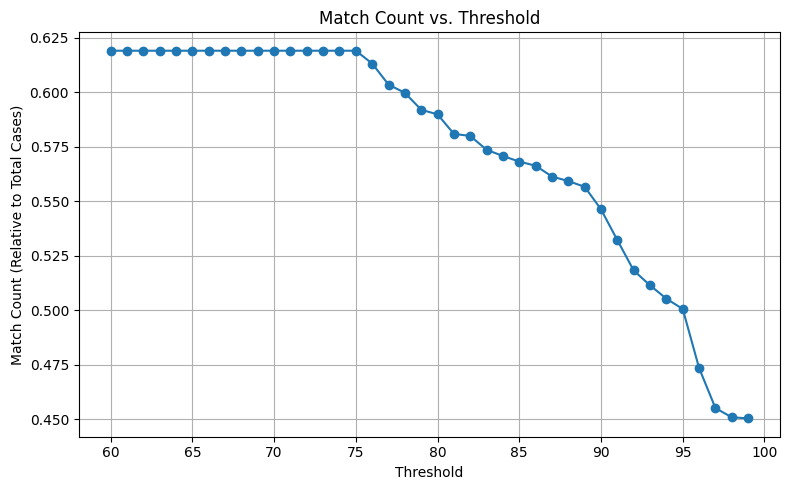

In [57]:
plt.figure(figsize=(8, 5))
plt.plot(results_df['threshold'], results_df['match_count_relative'], marker='o')
plt.xlabel('Threshold')
plt.ylabel('Match Count (Relative to Total Cases)')
plt.title('Match Count vs. Threshold')
plt.grid(True)
plt.tight_layout()
plt.savefig('../images/plot_match_count_vs_threshold.png', dpi=300)
plt.show()

In [58]:
results_multiple_hits = rec.add_substance(
    col_with_substances=col_with_substances,
    col_with_ref_substances=col_with_ref_substances,
    only_first_match=False,
    threshold=0.85,
    max_per_match_id=2
)
display(results_multiple_hits)

,Original,Preprocessed,Hit1,Mapped_to1,Similarity1,Hit2,Mapped_to2,Similarity2,Hit3,Mapped_to3,Similarity3,Hit4,Mapped_to4,Similarity4,Hit5,Mapped_to5,Similarity5,Hit6,Mapped_to6,Similarity6
0,Dacarbazin (DTIC),Dacarbazin (DTIC),Dacarbazin,Dacarbazin,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ribociclib,Ribociclib,Ribociclib,Ribociclib,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wirkstoff: keine Angabe,Wirkstoff: keine Angabe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Midostaurin,Midostaurin,Midostaurin,Midostaurin,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cetuximab,Cetuximab,Cetuximab,Cetuximab,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,"Cecenu, Lomeblastin, CiCiNu","Cecenu, Lomeblastin, CiCiNu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4243,Sixantone,Sixantone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4244,Omeparazol 20,Omeparazol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4245,Cisplatin 25mg/m²,Cisplatin 25mg/m²,Cisplatin,Cisplatin,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


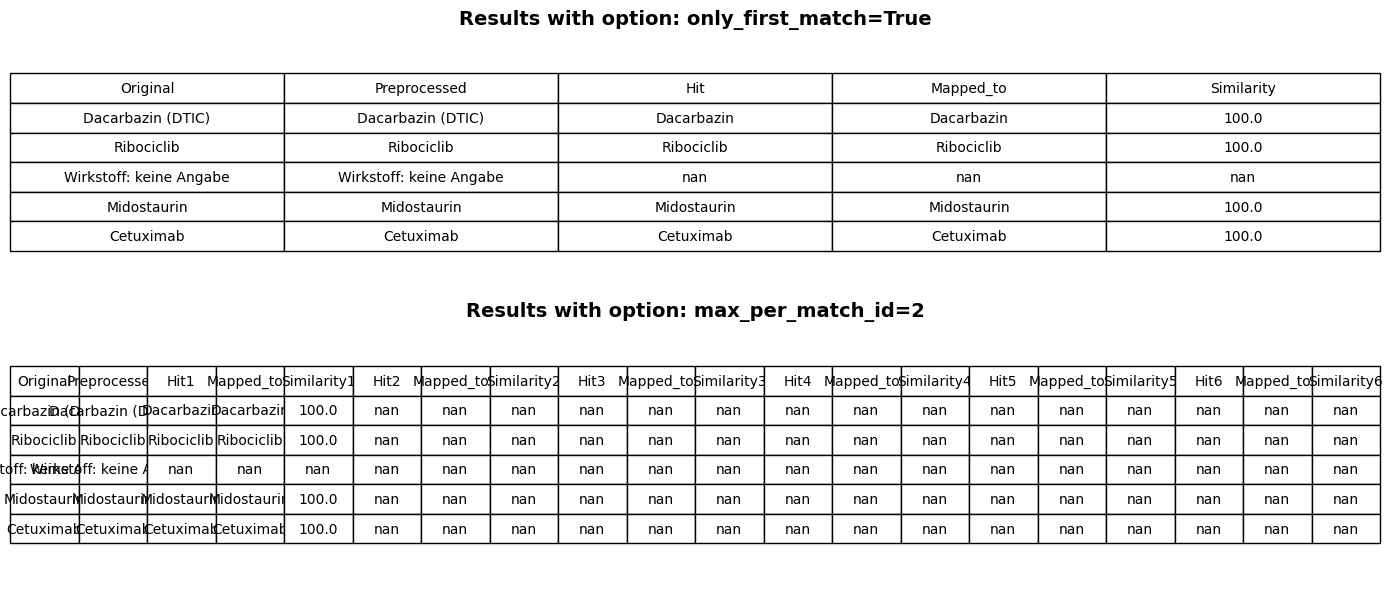

In [59]:
table_data1 = results.head()
table_data2 = results_multiple_hits.head()

# Set up vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6))  # Adjust height as needed

# Plot first table
ax1.axis('off')
ax1.set_title('Results with option: only_first_match=True', fontsize=14, fontweight='bold', pad=10)
table1 = ax1.table(cellText=table_data1.values,
                colLabels=table_data1.columns,
                cellLoc='center',
                loc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(10)
table1.scale(1, 1.5)

# Plot second table
ax2.axis('off')
ax2.set_title('Results with option: max_per_match_id=2', fontsize=14, fontweight='bold', pad=10)
table2 = ax2.table(cellText=table_data2.values,
                colLabels=table_data2.columns,
                cellLoc='center',
                loc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(10)
table2.scale(1, 1.5)

# Save the figure
plt.tight_layout()
plt.savefig('../images/atomic_vs_multiple.png', dpi=300, bbox_inches='tight')
plt.show()